In [1]:
import pandas as pd
import numpy as np
import ast
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
# from functions_josh import *

In [2]:
# Load dataframe
df = pd.read_csv('shows_imdb_rt.csv', index_col=0)

In [3]:
# Take a peek
df.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,rt_audience_rating,genres,tv_rating,release_year,runtime_mins,imdb_url
0,La Casa de Papel,Netflix,8.5,215007,91.0,82.0,"['action', 'crime', 'mystery', 'thriller']",TV-MA,2017.0,70.0,https://www.imdb.com/title/tt6468322/
1,Ozark,Netflix,8.4,136710,81.0,91.0,"['crime', 'drama', 'thriller']",TV-MA,2017.0,60.0,https://www.imdb.com/title/tt5071412/
2,Tiger King,Netflix,7.8,33700,86.0,86.0,"['documentary', 'crime']",TV-MA,2020.0,31.0,https://www.imdb.com/title/tt11823076/
3,Westworld,HBO,8.7,388252,85.0,80.0,"['drama', 'mystery', 'sci-fi', 'western']",TV-MA,2016.0,62.0,https://www.imdb.com/title/tt0475784/
4,The Walking Dead,AMC,8.2,821809,81.0,78.0,"['drama', 'horror', 'thriller']",TV-MA,2010.0,44.0,https://www.imdb.com/title/tt1520211/


In [4]:
# Check for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               247 non-null    object 
 1   network             247 non-null    object 
 2   imdb_rating         247 non-null    float64
 3   num_imdb_ratings    247 non-null    int64  
 4   rt_critic_rating    247 non-null    float64
 5   rt_audience_rating  194 non-null    float64
 6   genres              247 non-null    object 
 7   tv_rating           247 non-null    object 
 8   release_year        247 non-null    float64
 9   runtime_mins        247 non-null    float64
 10  imdb_url            247 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 23.2+ KB


In [5]:
# Drop column with null values, knowing we can grab it later if necessary
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             247 non-null    object 
 1   network           247 non-null    object 
 2   imdb_rating       247 non-null    float64
 3   num_imdb_ratings  247 non-null    int64  
 4   rt_critic_rating  247 non-null    float64
 5   genres            247 non-null    object 
 6   tv_rating         247 non-null    object 
 7   release_year      247 non-null    float64
 8   runtime_mins      247 non-null    float64
 9   imdb_url          247 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 21.2+ KB


In [6]:
# Change dtypes for columns without null values
df[['rt_critic_rating', 'release_year', 'runtime_mins']] = df[['rt_critic_rating', 'release_year', 'runtime_mins']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             247 non-null    object 
 1   network           247 non-null    object 
 2   imdb_rating       247 non-null    float64
 3   num_imdb_ratings  247 non-null    int64  
 4   rt_critic_rating  247 non-null    int64  
 5   genres            247 non-null    object 
 6   tv_rating         247 non-null    object 
 7   release_year      247 non-null    int64  
 8   runtime_mins      247 non-null    int64  
 9   imdb_url          247 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.2+ KB


In [7]:
# Notice that genres are lists trapped inside a string
df.iloc[1]['genres']

"['crime', 'drama', 'thriller']"

In [8]:
# De-stringify the genres list scraped from IMDB
df['genres'] = df.genres.apply(lambda x: ast.literal_eval(x))
df.iloc[1]['genres']

['crime', 'drama', 'thriller']

In [9]:
# Make a dataframe of dummy genre colums to get a count of each genre
df_genres = pd.get_dummies(df['genres'].apply(pd.Series).stack()).sum(level=0)
df_genres

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
243,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
244,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
245,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Merge dummies dataframe onto original dataframe
df = pd.concat([df, df_genres], axis=1)
# Take a peek
df.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,0,1,0,0
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,0,1,0,0
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,0
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,0,1,0,0,0,0,0,1
4,The Walking Dead,AMC,8.2,821809,81,"[drama, horror, thriller]",TV-MA,2010,44,https://www.imdb.com/title/tt1520211/,...,0,0,0,0,0,0,0,1,0,0


In [12]:
# Remove outliers for the crucial numerical data

# Calculate the z-scores of the numerical data
z_scores = stats.zscore(df[['imdb_rating', 'num_imdb_ratings', 'rt_critic_rating', 'release_year']])
# Turn those scores into all positive values, so we can easily separate
abs_z_scores = np.abs(z_scores)
# Filter out outliers (more than 3 standard deviations from the mean)
filtered_entries = (abs_z_scores < 3).all(axis=1)
# Update the dataframe
df = df[filtered_entries]

In [13]:
# See that 16 rows were eliminated
df.shape

(231, 36)

In [14]:
# Save a copy for good measure :P
df.to_csv('shows_imdb_rt_updated.csv')

In [131]:
# Set up a parameter to include only contemporary shows (released in the last decade)
df_contemp = df[df['release_year'] >= 2010]
df_contemp.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,0,1,0,0
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,0,1,0,0
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,0
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,0,1,0,0,0,0,0,1
6,Better Call Saul,AMC,8.7,280536,97,"[crime, drama]",TV-MA,2015,46,https://www.imdb.com/title/tt3032476/,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_contemp.columns

Index(['title', 'network', 'imdb_rating', 'num_imdb_ratings',
       'rt_critic_rating', 'genres', 'tv_rating', 'release_year',
       'runtime_mins', 'imdb_url', 'action', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'game-show', 'history', 'horror', 'music', 'musical',
       'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport',
       'talk-show', 'thriller', 'war', 'western'],
      dtype='object')

In [46]:
genres_contemp = df_contemp[
    ['action', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'game-show', 'history', 'horror', 'music', 'musical',
       'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport',
       'talk-show', 'thriller', 'war', 'western']
    ]
genres_contemp.sum()

action         31
adventure      21
animation      15
biography       6
comedy         35
crime          47
documentary    14
drama          97
family          4
fantasy        20
game-show       0
history        10
horror         11
music           2
musical         1
mystery        32
news            1
reality-tv      2
romance        10
sci-fi         27
short           1
sport           3
talk-show       3
thriller       42
war             3
western         2
dtype: int64

In [47]:
genres_contemp = genres_contemp[genres_contemp.columns[genres_contemp.sum() >= 10]]

In [48]:
genres_contemp.sum()

action         31
adventure      21
animation      15
comedy         35
crime          47
documentary    14
drama          97
fantasy        20
history        10
horror         11
mystery        32
romance        10
sci-fi         27
thriller       42
dtype: int64

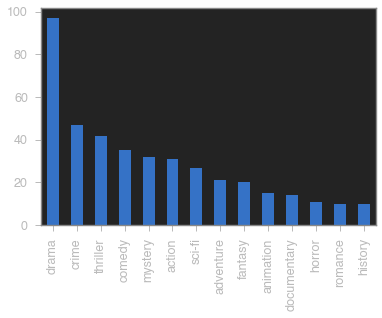

In [49]:
genres_contemp.sum().sort_values(ascending=False).plot.bar()

In [50]:
genres_contemp_imdb_rating = genres_contemp.apply(lambda x: x*df['imdb_rating'])
genres_contemp_rt_rating = genres_contemp.apply(lambda x: x*df['rt_critic_rating'])
genres_contemp_popularity = genres_contemp.apply(lambda x: x*df['num_imdb_ratings'])

In [70]:
genre_imdb_avg = genres_contemp_imdb_rating.sum()/genres_contemp.sum()
genre_imdb_avg

action         8.348387
adventure      8.385714
animation      8.680000
comedy         8.522857
crime          8.331915
documentary    8.771429
drama          8.315464
fantasy        8.390000
history        8.700000
horror         8.309091
mystery        8.237500
romance        8.490000
sci-fi         8.377778
thriller       8.366667
dtype: float64

(8.0, 9.0)

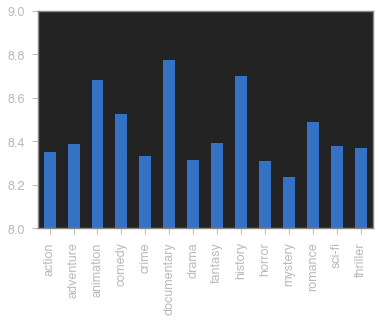

In [71]:
genre_imdb_avg.plot.bar()
plt.ylim(8.0,9.0)

In [64]:
genre_rt_avg = genres_contemp_rt_rating.sum()/genres_contemp.sum()
genre_rt_avg

action         87.096774
adventure      86.904762
animation      95.200000
comedy         92.200000
crime          88.829787
documentary    91.785714
drama          86.979381
fantasy        89.700000
history        87.800000
horror         85.454545
mystery        87.312500
romance        86.400000
sci-fi         89.962963
thriller       88.738095
dtype: float64

(82.0, 96.0)

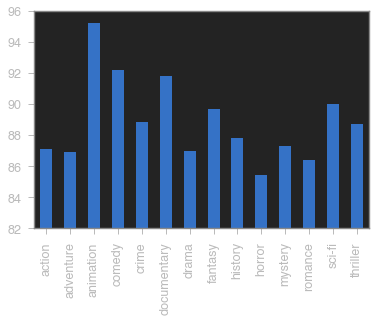

In [68]:
genre_rt_avg.plot.bar()
plt.ylim(82,96)

In [65]:
genre_pop_avg = genres_contemp_popularity.sum()/genres_contemp.sum()
genre_pop_avg

action         118855.354839
adventure      135932.523810
animation       72380.466667
comedy          72374.714286
crime          133846.872340
documentary     28096.714286
drama          123349.989691
fantasy         80133.650000
history        158686.600000
horror         107080.909091
mystery        123911.781250
romance        128249.800000
sci-fi         137409.000000
thriller       142652.380952
dtype: float64

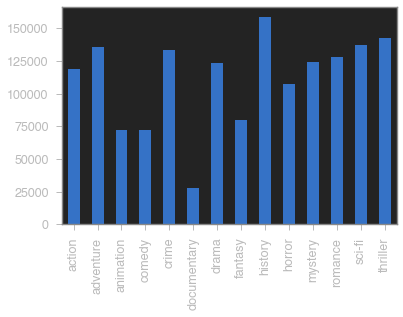

In [67]:
genre_pop_avg.plot.bar()

In [74]:
genres_contemp.columns

Index(['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'history', 'horror', 'mystery', 'romance', 'sci-fi',
       'thriller'],
      dtype='object')

(array([63., 23., 15., 11.,  5.,  4.,  6.,  2.,  4.,  3.]),
 array([  1430. ,  48429.8,  95429.6, 142429.4, 189429.2, 236429. ,
        283428.8, 330428.6, 377428.4, 424428.2, 471428. ]),
 <a list of 10 Patch objects>)

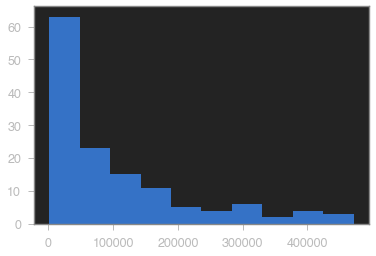

In [203]:
plt.hist(df_contemp['num_imdb_ratings'], bins=10)

(array([ 5.,  1.,  5.,  3.,  6.,  8., 17., 18., 39., 34.]),
 array([ 57. ,  61.3,  65.6,  69.9,  74.2,  78.5,  82.8,  87.1,  91.4,
         95.7, 100. ]),
 <a list of 10 Patch objects>)

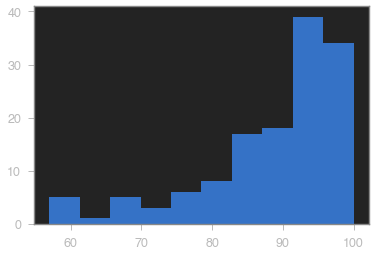

In [204]:
plt.hist(df_contemp['rt_critic_rating'], bins=10)

(array([ 5.,  8.,  6., 13.,  8., 45., 40.,  5.,  2.,  4.]),
 array([7.2 , 7.43, 7.66, 7.89, 8.12, 8.35, 8.58, 8.81, 9.04, 9.27, 9.5 ]),
 <a list of 10 Patch objects>)

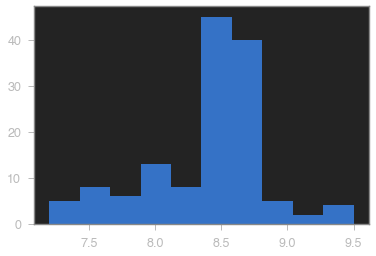

In [205]:
plt.hist(df_contemp['imdb_rating'], bins=10)

(array([1., 0., 0., 3., 0., 0., 2., 3., 4., 1.]),
 array([ 28096.71428571,  41155.70285714,  54214.69142857,  67273.68      ,
         80332.66857143,  93391.65714286, 106450.64571429, 119509.63428571,
        132568.62285714, 145627.61142857, 158686.6       ]),
 <a list of 10 Patch objects>)

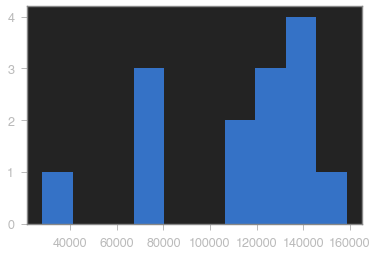

In [196]:
plt.hist(genre_pop_avg, bins=10)

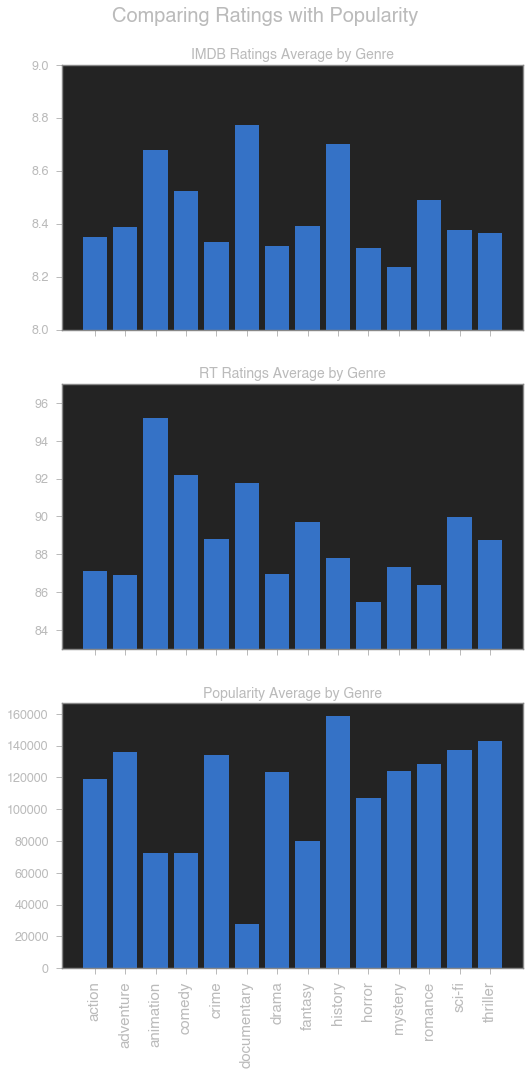

In [113]:
x = genres_contemp.columns
y1 = genre_imdb_avg
y2 = genre_rt_avg
y3 = genre_pop_avg

fig, axs = plt.subplots(3,sharex=True,figsize=(8,15))
fig.suptitle('Comparing Ratings with Popularity', fontsize=20, y=1.01)

axs[0].bar(x,y1)
axs[0].set_ylim([8.0,9.0])
axs[0].set_title('IMDB Ratings Average by Genre', fontsize=14)

axs[1].bar(x,y2)
axs[1].set_ylim([83,97])
axs[1].set_title('RT Ratings Average by Genre', fontsize=14)

axs[2].bar(x,y3)
axs[2].set_title('Popularity Average by Genre', fontsize=14)

plt.xticks(rotation='vertical', fontsize=15)
fig.tight_layout(pad=3.0)

In [111]:
genre_pop_avg.corr(genre_imdb_avg)

-0.4877942302531624

In [152]:
df_contemp = df[df['release_year'] >= 2010]
df_contemp.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,0,1,0,0
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,0,1,0,0
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,0
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,0,1,0,0,0,0,0,1
6,Better Call Saul,AMC,8.7,280536,97,"[crime, drama]",TV-MA,2015,46,https://www.imdb.com/title/tt3032476/,...,0,0,0,0,0,0,0,0,0,0


In [189]:
conditions = [
    (df_contemp['network'].str.find('BBC') >= 0),
    (df_contemp['network'].str.find('Amazon') >= 0),
    (df_contemp['network'].str.find('Hulu') >= 0),
    (df_contemp['network'].str.find('NBC') >= 0),
    (df_contemp['network'].str.find('Acorn') >= 0),
    (df_contemp['network'].str.find('Cartoon Network') >= 0),
    (df_contemp['network'].str.find('Netflix') >= 0),
    (df_contemp['network'].str.find('Disney') >= 0)
]

choices = [
    'BBC',
    'Amazon',
    'Hulu',
    'NBC',
    'Acorn',
    'Cartoon Network',
    'Netflix',
    'Disney'
]

df_contemp['network'] = np.select(conditions, choices, default=df_contemp['network'])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [190]:
df_contemp['network'].value_counts()

Netflix            35
HBO                13
NBC                 9
Amazon              8
FX                  7
Hulu                7
BBC                 6
Cartoon Network     6
CW                  5
USA                 3
Starz               3
ABC                 3
PBS                 3
Showtime            2
Crunchyroll         2
Acorn               2
CBS                 2
Disney              2
Apple TV+           1
Aniplex             1
TruTV               1
Cinemax             1
AMC                 1
Comedy Central      1
Science             1
SyFy                1
SVT                 1
History             1
louisck.net         1
Channel 5           1
WEB TV US           1
YouTube Premium     1
AT-X                1
POP                 1
ZDF                 1
NGC                 1
Name: network, dtype: int64

In [180]:
conditions = [
    ('BBC' in df_contemp['network'].str.find("BBC") >= 0),
    ('Amazon' in df_contemp['network']),
    ('Hulu' in df_contemp['network']),
    ('NBC' in df_contemp['network']),
    ('Acorn' in df_contemp['network']),
    ('Cartoon Network' in df_contemp['network']),
    ('Netflix' in df_contemp['network'])
]

choices = [
    'BBC',
    'Amazon',
    'Hulu',
    'NBC',
    'Acorn',
    'Cartoon Network',
    'Netflix'
]

df_contemp['network'] = np.select(conditions, choices, default=df_contemp['network'])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [184]:
df_contemp['network_updated'] = np.where(("BBC" in df_contemp['network']), "BBC", df_contemp['network'])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
df_contemp['network_updated']

0        Netflix
1        Netflix
2        Netflix
3            HBO
6            AMC
         ...    
237    Channel 5
239          ZDF
241      BBC Two
245           FX
246      Netflix
Name: network_updated, Length: 136, dtype: object

In [121]:
network_contemp = df_contemp['network'].value_counts()
network_contemp

Netflix                                                 34
HBO                                                     13
NBC                                                      8
FX                                                       7
Hulu                                                     6
CW                                                       5
Amazon Prime Video                                       4
Cartoon Network                                          4
PBS                                                      3
USA                                                      3
Starz                                                    3
Amazon                                                   3
ABC                                                      3
CBS                                                      2
Showtime                                                 2
BBC America                                              2
Crunchyroll                                             

In [154]:
df[df['release_year'] >= 2010]

Index(['action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'game-show', 'history',
       'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv',
       'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'war',
       'western'],
      dtype='object')

(array([ 3.,  2.,  3.,  5.,  3.,  3.,  8.,  5.,  3.,  5., 10., 35., 18.,
        22.,  4.,  1.,  1.,  1.,  2.,  2.]),
 array([7.2  , 7.315, 7.43 , 7.545, 7.66 , 7.775, 7.89 , 8.005, 8.12 ,
        8.235, 8.35 , 8.465, 8.58 , 8.695, 8.81 , 8.925, 9.04 , 9.155,
        9.27 , 9.385, 9.5  ]),
 <a list of 20 Patch objects>)

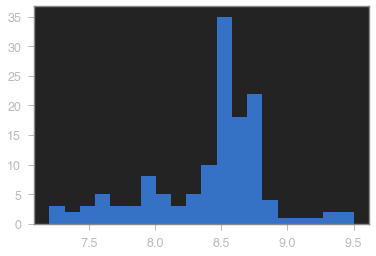

In [217]:
plt.hist(df[df['release_year'] >= 2010]['imdb_rating'], bins=20)

In [219]:
df[df['release_year'] >= 2010]['imdb_rating']

98     9.5
64     9.4
101    9.3
102    9.3
36     9.2
      ... 
88     7.4
60     7.4
48     7.3
44     7.2
80     7.2
Name: imdb_rating, Length: 136, dtype: float64

In [216]:
df[df['release_year'] >= 2010]['rt_critic_rating']

98     100
64      96
101     97
102     93
36      95
      ... 
88      83
60      66
48      72
44      59
80      57
Name: rt_critic_rating, Length: 136, dtype: int64

(array([ 4.,  1.,  1.,  0.,  3.,  2.,  2.,  1.,  2.,  4.,  2.,  6.,  5.,
        12., 10.,  8., 24., 15., 17., 17.]),
 array([ 57.  ,  59.15,  61.3 ,  63.45,  65.6 ,  67.75,  69.9 ,  72.05,
         74.2 ,  76.35,  78.5 ,  80.65,  82.8 ,  84.95,  87.1 ,  89.25,
         91.4 ,  93.55,  95.7 ,  97.85, 100.  ]),
 <a list of 20 Patch objects>)

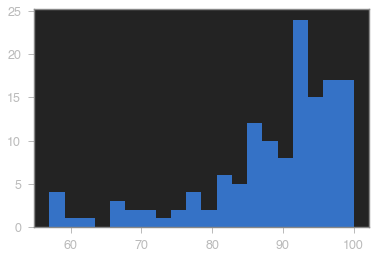

In [218]:
plt.hist(df[df['release_year'] >= 2010]['rt_critic_rating'], bins=20)

In [199]:
df_contemp.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western,network_updated
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,1,0,0,Netflix
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,1,0,0,Netflix
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,Netflix
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,1,0,0,0,0,0,1,HBO
6,Better Call Saul,AMC,8.7,280536,97,"[crime, drama]",TV-MA,2015,46,https://www.imdb.com/title/tt3032476/,...,0,0,0,0,0,0,0,0,0,AMC


In [228]:
df1 = df[df['runtime_mins'] <= 43]
df2 = df[df['runtime_mins'] > 43]

In [229]:
df1['imdb_rating'].describe()

count    118.000000
mean       8.488136
std        0.407865
min        7.200000
25%        8.400000
50%        8.500000
75%        8.700000
max        9.500000
Name: imdb_rating, dtype: float64

In [230]:
df2['imdb_rating'].describe()

count    113.000000
mean       8.475221
std        0.396982
min        7.200000
25%        8.400000
50%        8.500000
75%        8.700000
max        9.400000
Name: imdb_rating, dtype: float64

In [231]:
df1['rt_critic_rating'].describe()

count    118.000000
mean      91.762712
std        8.497036
min       57.000000
25%       88.000000
50%       93.000000
75%      100.000000
max      100.000000
Name: rt_critic_rating, dtype: float64

In [232]:
df2['rt_critic_rating'].describe()

count    113.000000
mean      86.867257
std       10.043214
min       59.000000
25%       82.000000
50%       89.000000
75%       94.000000
max      100.000000
Name: rt_critic_rating, dtype: float64

In [202]:
df_contemp['runtime_mins'].corr(df_contemp['rt_critic_rating'])

-0.31174106258413303